In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import random

import cv2

In [ ]:
import keras
from tensorflow import keras
import keras.layers as layers
from keras.models import Sequential,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

import tensorflow as tf

In [ ]:
path = '/content/drive/MyDrive/Breast Cancer DS/all-mias'

In [ ]:
print("reading dataframe")
info = pd.read_csv("/content/drive/MyDrive/Breast Cancer DS/Info.txt",sep=" ")
info=info.drop('Unnamed: 7',axis=1)

reading dataframe


In [ ]:
info


,REFNUM,BG,CLASS,SEVERITY,X,Y,RADIUS
0,mdb001,G,CIRC,B,535.0,425.0,197.0
1,mdb002,G,CIRC,B,522.0,280.0,69.0
2,mdb003,D,NORM,NaN,NaN,NaN,NaN
3,mdb004,D,NORM,NaN,NaN,NaN,NaN
4,mdb005,F,CIRC,B,477.0,133.0,30.0
...,...,...,...,...,...,...,...
325,mdb318,D,NORM,NaN,NaN,NaN,NaN
326,mdb319,D,NORM,NaN,NaN,NaN,NaN
327,mdb320,D,NORM,NaN,NaN,NaN,NaN
328,mdb321,D,NORM,NaN,NaN,NaN,NaN


In [ ]:
info.isnull().sum()

REFNUM        0
BG            0
CLASS         0
SEVERITY    207
X           211
Y           211
RADIUS      211
dtype: int64

In [ ]:
kn = KNNImputer(missing_values= np.nan, n_neighbors= 5)
info[['X']] = kn.fit_transform(info[['X']])
info[['Y']] = kn.fit_transform(info[['Y']])
info[['RADIUS']] = kn.fit_transform(info[['X']])

In [ ]:
imputer = SimpleImputer(missing_values= np.nan,
                        strategy='most_frequent')
info[['SEVERITY']] = imputer.fit_transform(info[['SEVERITY']])


In [ ]:
info.isnull().sum()

REFNUM      0
BG          0
CLASS       0
SEVERITY    0
X           0
Y           0
RADIUS      0
dtype: int64

In [ ]:
info

,REFNUM,BG,CLASS,SEVERITY,X,Y,RADIUS
0,mdb001,G,CIRC,B,535.000000,425.000000,535.000000
1,mdb002,G,CIRC,B,522.000000,280.000000,522.000000
2,mdb003,D,NORM,B,488.605042,520.983193,488.605042
3,mdb004,D,NORM,B,488.605042,520.983193,488.605042
4,mdb005,F,CIRC,B,477.000000,133.000000,477.000000
...,...,...,...,...,...,...,...
325,mdb318,D,NORM,B,488.605042,520.983193,488.605042
326,mdb319,D,NORM,B,488.605042,520.983193,488.605042
327,mdb320,D,NORM,B,488.605042,520.983193,488.605042
328,mdb321,D,NORM,B,488.605042,520.983193,488.605042


In [ ]:
info[['SEVERITY']].value_counts()

SEVERITY
B           276
M            54
dtype: int64

In [ ]:
# We can also use label encoder for encoding 
label = []
for i in range (len(info)):
  if info.SEVERITY[i] == 'B':
    label.append(1)
  else :
    label.append(0)

In [ ]:
label = np.array(label)
label.shape

(330,)

In [ ]:
# define the every images filepaths in to list
img_path = []

for i in range (len(info)):
  img_path.append(path +'/'+ info.REFNUM[i]+ '.pgm')

In [ ]:
img_name = np.array(img_path)
img_name.shape

(330,)

**subplot(m,n,p)** - divides the current figure into an m-by-n grid and creates axes in the position specified by p. MATLAB® numbers subplot positions by row. The first subplot is the first column of the first row, the second subplot is the second column of the first row, and so on. If axes exist in the specified position, then this command makes the axes the current axes.

**cv2.imread(path, flag)**
flag - 0 : Greyscale
       1 : colour (default)
      -1 : Unchanged

**tight_layout** -  automatically adjusts subplot params so that the subplot(s) fits in to the figure area. This is an experimental feature and may not work for some cases. It only checks the extents of ticklabels, axis labels, and titles.

**plt.axis('off')** - Turn off axis lines and labels.

In [ ]:
img_name

array(['/content/drive/MyDrive/Breast Cancer DS/all-mias/mdb001.pgm',
       '/content/drive/MyDrive/Breast Cancer DS/all-mias/mdb002.pgm',
       '/content/drive/MyDrive/Breast Cancer DS/all-mias/mdb003.pgm',
       '/content/drive/MyDrive/Breast Cancer DS/all-mias/mdb004.pgm',
       '/content/drive/MyDrive/Breast Cancer DS/all-mias/mdb005.pgm',
       '/content/drive/MyDrive/Breast Cancer DS/all-mias/mdb005.pgm',
       '/content/drive/MyDrive/Breast Cancer DS/all-mias/mdb006.pgm',
       '/content/drive/MyDrive/Breast Cancer DS/all-mias/mdb007.pgm',
       '/content/drive/MyDrive/Breast Cancer DS/all-mias/mdb008.pgm',
       '/content/drive/MyDrive/Breast Cancer DS/all-mias/mdb009.pgm',
       '/content/drive/MyDrive/Breast Cancer DS/all-mias/mdb010.pgm',
       '/content/drive/MyDrive/Breast Cancer DS/all-mias/mdb011.pgm',
       '/content/drive/MyDrive/Breast Cancer DS/all-mias/mdb012.pgm',
       '/content/drive/MyDrive/Breast Cancer DS/all-mias/mdb013.pgm',
       '/content/dri

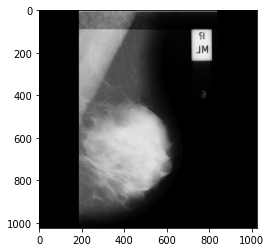

In [ ]:
img = cv2.imread(img_name[1])
plt.imshow(img)

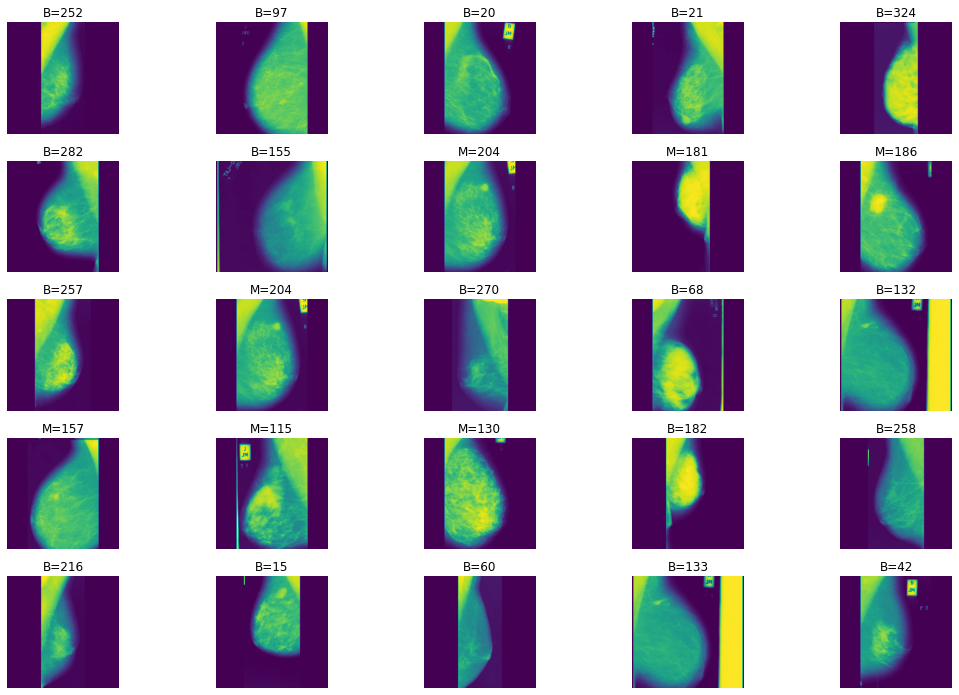

In [ ]:
import matplotlib.pyplot as plt
from importlib import reload
plt=reload(plt)

def view_25_random_image():
    fig = plt.figure(figsize = (15, 10))
    for i in range(25):
        rand = random.randint(0,len(label)-1)
        ax = plt.subplot(5, 5, i+1)
    
        img = cv2.imread(img_name[rand], 0)
        img = cv2.resize(img, (256,256))
        if label[rand] == 1:
            plt.title("B={}".format(rand))
        else:
            plt.title("M={}".format(rand))
        plt.tight_layout()
        plt.axis('off')
        plt.imshow(img)
    fig.savefig('random_25_image_fig.png')

random_images = view_25_random_image()





Rotation is a three-step operation:

* First, you need to get the center of rotation. This typically is the center of the image you are trying to rotate.
* Next, create the 2D-rotation matrix. OpenCV provides the getRotationMatrix2D() function that we discussed above. 
* Finally, apply the affine transformation to the image, using the rotation matrix you created in the previous step. The warpAffine() function in OpenCV does the job.

**getRotationMatrix2D(center, angle, scale)**
*   center: the center of rotation for the input image
*   angle: the angle of rotation in degrees
*   scale: an isotropic scale factor which scales the image up or down according to the value provided


The warpAffine() function applies an affine transformation to the image. After applying affine transformation, all the parallel lines in the original image will remain parallel in the output image as well.

**warpAffine(src, M, dsize[, dst[, flags[, borderMode[, borderValue]]]])**
*  src: the source mage
*  M: the transformation matrix
*  dsize: size of the output image
*  dst: the output image
*  flags: combination of interpolation methods such as INTER_LINEAR or INTER_NEAREST
*  borderMode: the pixel extrapolation method
*  borderValue: the value to be used in case of a constant border, has a default value of 0













In [ ]:
img_path = []
last_label = []
for i in range(len(img_name)):
    
    img = cv2.imread(img_name[i], 0)
    img = cv2.resize(img, (224,224))
    rows, cols= img.shape
    for angle in range(90):
            M = cv2.getRotationMatrix2D((cols / 2, rows / 2), angle, 1)    #Rotate 0 degree
            img_rotated = cv2.warpAffine(img, M, (224, 224))
            img_path.append(img_rotated)
            if label[i] == 1:
                last_label.append(1)
            else:
                last_label.append(0)

In [ ]:
last_label = np.array(last_label)
img_path = np.array(img_path)
print(last_label.shape)
print(img_path.shape)

(29700,)
(29700, 224, 224)


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(img_path, last_label, test_size = 0.2, random_state = 42)

In [ ]:
x_train[0].shape

(224, 224)

# **CNN**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Conv2D, MaxPool2D, Flatten
from keras import optimizers
from keras import losses

def create_model():
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(224, 224, 1)))
    model.add(Conv2D(64, kernel_size=(3,3),activation='relu'))
    model.add(MaxPool2D(pool_size=(2, 2)))

    model.add(Conv2D(64, kernel_size=(3,3),activation='relu'))
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
  
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(1, activation='sigmoid'))
    return model

In [ ]:
model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      320       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 54, 54, 64)        0

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

early_stop = EarlyStopping(monitor='val_loss', mode='min', patience=2,restore_best_weights=True, verbose=1)

check_point_filepath = './'

model_check_point = ModelCheckpoint(filepath =check_point_filepath, monitor='val_loss', verbose=1, save_best_only=True,
                                    save_weights_only=False, mode='auto', save_freq='epoch')

In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

hist = model.fit(x_train,
                 y_train,
                 validation_split=0.2,
                 epochs=50,
                 batch_size=64,
                 callbacks=[early_stop, model_check_point])

Epoch 1/50
297/297 [==============================] - ETA: 0s - loss: 1.0070 - accuracy: 0.8254
Epoch 1: val_loss improved from inf to 0.41818, saving model to ./


297/297 [==============================] - 79s 229ms/step - loss: 1.0070 - accuracy: 0.8254 - val_loss: 0.4182 - val_accuracy: 0.8361
Epoch 2/50
297/297 [==============================] - ETA: 0s - loss: 0.3717 - accuracy: 0.8541
Epoch 2: val_loss improved from 0.41818 to 0.36995, saving model to ./


297/297 [==============================] - 69s 234ms/step - loss: 0.3717 - accuracy: 0.8541 - val_loss: 0.3700 - val_accuracy: 0.8628
Epoch 3/50
297/297 [==============================] - ETA: 0s - loss: 0.3095 - accuracy: 0.8711
Epoch 3: val_loss improved from 0.36995 to 0.28912, saving model to ./


297/297 [==============================] - 70s 235ms/step - loss: 0.3095 - accuracy: 0.8711 - val_loss: 0.2891 - val_accuracy: 0.8851
Epoch 4/50
297/297 [==============================] - ETA: 0s - loss: 0.2510 - accuracy: 0.8969
Epoch 4: val_loss improved from 0.28912 to 0.26229, saving model to ./


297/297 [==============================] - 70s 236ms/step - loss: 0.2510 - accuracy: 0.8969 - val_loss: 0.2623 - val_accuracy: 0.8840
Epoch 5/50
297/297 [==============================] - ETA: 0s - loss: 0.1961 - accuracy: 0.9190
Epoch 5: val_loss improved from 0.26229 to 0.19615, saving model to ./


297/297 [==============================] - 70s 237ms/step - loss: 0.1961 - accuracy: 0.9190 - val_loss: 0.1961 - val_accuracy: 0.9152
Epoch 6/50
297/297 [==============================] - ETA: 0s - loss: 0.1417 - accuracy: 0.9430
Epoch 6: val_loss improved from 0.19615 to 0.14273, saving model to ./


297/297 [==============================] - 70s 235ms/step - loss: 0.1417 - accuracy: 0.9430 - val_loss: 0.1427 - val_accuracy: 0.9453
Epoch 7/50
297/297 [==============================] - ETA: 0s - loss: 0.1061 - accuracy: 0.9606
Epoch 7: val_loss did not improve from 0.14273
297/297 [==============================] - 69s 231ms/step - loss: 0.1061 - accuracy: 0.9606 - val_loss: 0.1485 - val_accuracy: 0.9390
Epoch 8/50
297/297 [==============================] - ETA: 0s - loss: 0.0834 - accuracy: 0.9692
Epoch 8: val_loss improved from 0.14273 to 0.10441, saving model to ./


297/297 [==============================] - 70s 235ms/step - loss: 0.0834 - accuracy: 0.9692 - val_loss: 0.1044 - val_accuracy: 0.9619
Epoch 9/50
297/297 [==============================] - ETA: 0s - loss: 0.0671 - accuracy: 0.9764
Epoch 9: val_loss improved from 0.10441 to 0.08332, saving model to ./


297/297 [==============================] - 69s 234ms/step - loss: 0.0671 - accuracy: 0.9764 - val_loss: 0.0833 - val_accuracy: 0.9680
Epoch 10/50
297/297 [==============================] - ETA: 0s - loss: 0.0573 - accuracy: 0.9810
Epoch 10: val_loss did not improve from 0.08332
297/297 [==============================] - 69s 231ms/step - loss: 0.0573 - accuracy: 0.9810 - val_loss: 0.0849 - val_accuracy: 0.9739
Epoch 11/50
297/297 [==============================] - ETA: 0s - loss: 0.0514 - accuracy: 0.9830Restoring model weights from the end of the best epoch: 9.

Epoch 11: val_loss did not improve from 0.08332
297/297 [==============================] - 69s 231ms/step - loss: 0.0514 - accuracy: 0.9830 - val_loss: 0.0918 - val_accuracy: 0.9684
Epoch 11: early stopping


In [ ]:
loss_value , accuracy = model.evaluate(x_test, y_test)

print('Test_loss_value = ' +str(loss_value))
print('test_accuracy = ' + str(accuracy))

print(model.predict(x_test))

186/186 [==============================] - 9s 46ms/step - loss: 0.0881 - accuracy: 0.9705
Test_loss_value = 0.08805657923221588
test_accuracy = 0.9705387353897095
186/186 [==============================] - 8s 42ms/step
[[0.99996924]
 [0.99947995]
 [0.99999213]
 ...
 [0.9509371 ]
 [0.9999896 ]
 [1.        ]]


In [ ]:
def Visualize_Result(acc,val_acc,loss, val_loss):
    fig, (ax1, ax2) = plt.subplots(nrows = 1,
                                   ncols = 2,
                                   figsize = (15,6),
                                   sharex =True)

    plot1 = ax1.plot(range(0, len(acc)),
                     acc,
                     label = 'accuracy')

    plot2 = ax1.plot(range(0, len(val_acc)),
                     val_acc,
                     label = 'val_accuracy')

    ax1.set(title = 'Accuracy And Val Accuracy progress',
            xlabel = 'epoch',
            ylabel = 'accuracy/ validation accuracy')

    ax1.legend()

    plot3 = ax2.plot(range(0, len(loss)),
                     loss,
                     label = 'loss')
    
    plot4 = ax2.plot(range(0, len(val_loss)),
                     val_loss,
                     label = 'val_loss')
    
    ax2.set(title = 'Loss And Val loss progress',
            xlabel = 'epoch',
            ylabel = 'loss/ validation loss')

    ax2.legend()

    fig.suptitle('Result Of Model', fontsize = 20, fontweight = 'bold')
    fig.savefig('Accuracy_Loss_figure.png')
    plt.tight_layout()
    plt.show()



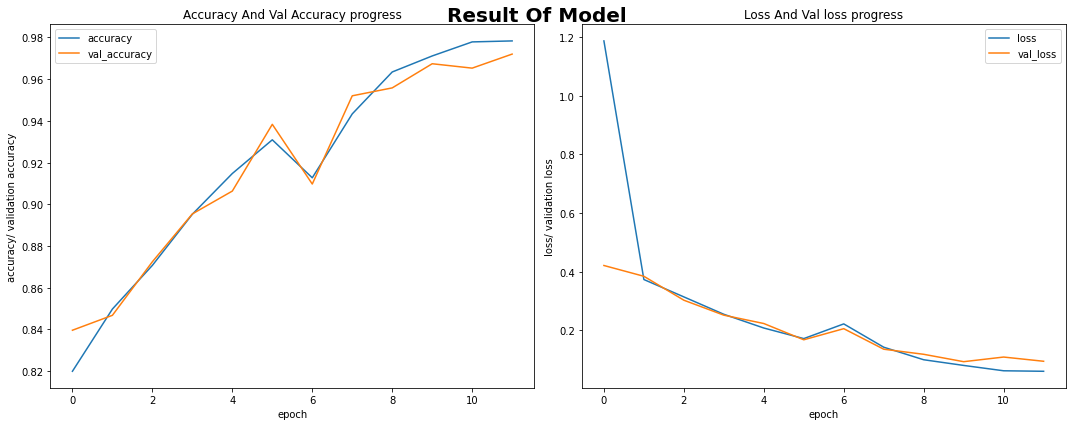

In [ ]:
visualize_result = Visualize_Result(hist.history['accuracy'],hist.history['val_accuracy'], hist.history['loss'], hist.history['val_loss'])


# **LeNet**

In [ ]:
model_1 = keras.Sequential()

model_1.add(layers.Conv2D(filters=6, kernel_size=(3, 3), activation='relu', input_shape=(224,224,1)))

model_1.add(layers.AveragePooling2D())
model_1.add(layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu'))
model_1.add(layers.AveragePooling2D())

model_1.add(layers.Flatten())
model_1.add(layers.Dense(units=120, activation='relu'))
model_1.add(layers.Dense(units=84, activation='relu'))
model_1.add(layers.Dense(units=1, activation = 'softmax'))


In [ ]:
model_1.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

In [ ]:
hist_1 = model_1.fit(x_train,
                 y_train,
                 validation_split=0.2,
                 epochs=50,
                 batch_size=64,
                 callbacks=[early_stop, model_check_point])

Epoch 1/50
296/297 [============================>.] - ETA: 0s - loss: 0.0000e+00 - accuracy: 0.8382
Epoch 1: val_loss improved from inf to 0.00000, saving model to ./


297/297 [==============================] - 10s 30ms/step - loss: 0.0000e+00 - accuracy: 0.8383 - val_loss: 0.0000e+00 - val_accuracy: 0.8323
Epoch 2/50
296/297 [============================>.] - ETA: 0s - loss: 0.0000e+00 - accuracy: 0.8385
Epoch 2: val_loss did not improve from 0.00000
297/297 [==============================] - 7s 24ms/step - loss: 0.0000e+00 - accuracy: 0.8383 - val_loss: 0.0000e+00 - val_accuracy: 0.8323
Epoch 3/50
297/297 [==============================] - ETA: 0s - loss: 0.0000e+00 - accuracy: 0.8383Restoring model weights from the end of the best epoch: 1.

Epoch 3: val_loss did not improve from 0.00000
297/297 [==============================] - 8s 25ms/step - loss: 0.0000e+00 - accuracy: 0.8383 - val_loss: 0.0000e+00 - val_accuracy: 0.8323
Epoch 3: early stopping


In [ ]:
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 222, 222, 6)       60        
                                                                 
 average_pooling2d (AverageP  (None, 111, 111, 6)      0         
 ooling2D)                                                       
                                                                 
 conv2d_6 (Conv2D)           (None, 109, 109, 16)      880       
                                                                 
 average_pooling2d_1 (Averag  (None, 54, 54, 16)       0         
 ePooling2D)                                                     
                                                                 
 flatten_1 (Flatten)         (None, 46656)             0         
                                                                 
 dense_2 (Dense)             (None, 120)              

In [ ]:
loss_value_1 , accuracy_1 = model_1.evaluate(x_test, y_test)

print('Test_loss_value = ' +str(loss_value_1))
print('test_accuracy = ' + str(accuracy_1))

print(model_1.predict(x_test))

186/186 [==============================] - 1s 7ms/step - loss: 0.0000e+00 - accuracy: 0.8333
Test_loss_value = 0.0
test_accuracy = 0.8333333134651184
186/186 [==============================] - 1s 5ms/step
[[1.]
 [1.]
 [1.]
 ...
 [1.]
 [1.]
 [1.]]


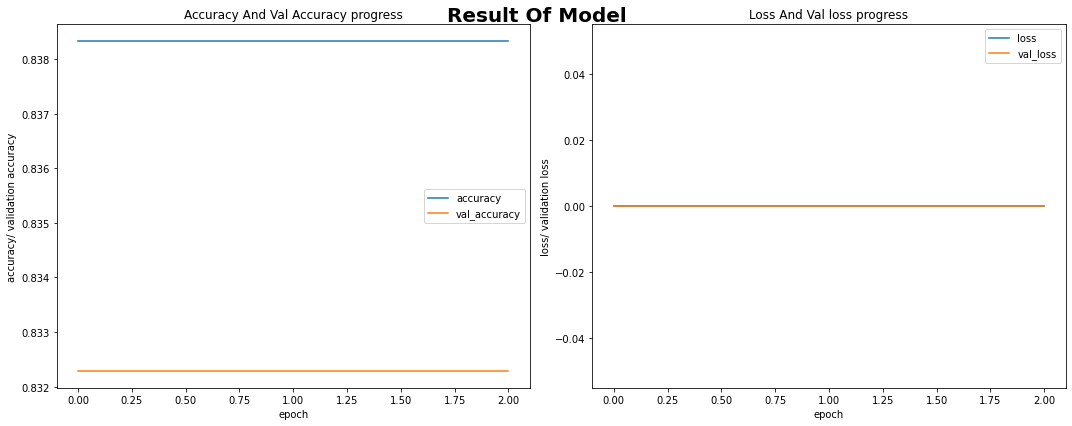

In [ ]:
visualize_result = Visualize_Result(hist_1.history['accuracy'],hist_1.history['val_accuracy'], hist_1.history['loss'], hist_1.history['val_loss'])


In [ ]:
model.save('/content/drive/MyDrive/Breast Cancer DS/Model.h5')

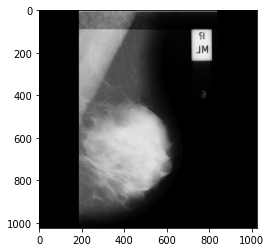

In [ ]:
img = cv2.imread('/content/drive/MyDrive/Breast Cancer DS/all-mias/mdb002.pgm')
plt.imshow(img)